# Introduction to Pandas

Lino Galiana  
2025-10-06

<div class="badge-container"><div class="badge-text">If you want to try the examples in this tutorial:</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/en/manipulation/02_pandas_intro.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«02_pandas_intro»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«en/manipulation%2002_pandas_intro%20correction»" target="_blank" rel="noopener"><img src="https://custom-icon-badges.demolab.com/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=vsc&logoColor=white" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«02_pandas_intro»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«en/manipulation%2002_pandas_intro%20correction»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks-colab//en/blob/main//notebooks/en/manipulation/02_pandas_intro.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

> **Note**
>
> Ceci est la version française 🇫🇷 de ce chapitre, pour voir la version anglaise allez <a href="/home/runner/work/python-datascientist/python-datascientist/en/content/manipulation/02_pandas_intro.qmd">ici</a>.

> **Skills to be acquired by the end of this chapter**
>
> -   Import a dataset as a `Pandas` dataframe and explore its structure;
> -   Perform manipulations on columns and rows;
> -   Construct aggregate statistics and chain operations;
> -   Use `Pandas` graphical methods to quickly represent data distribution.

# 1. Introduction

The `Pandas` package has been the central piece of the data science ecosystem for about a decade. The *DataFrame*, a central object in languages like `R` or `Stata`, had long been absent in the `Python` ecosystem. Yet, thanks to `Numpy`, all the basic components were present but needed to be reconfigured to meet the needs of data scientists.

Wes McKinney, when he built `Pandas` to provide a dataframe leveraging the numerical computation library `Numpy` in the background, enabled a significant leap forward for `Python` in data analysis, explaining its popularity in the data science ecosystem. `Pandas` is not without limitations[1], which we will have the opportunity to discuss, but the vast array of analysis methods it offers greatly simplifies data analysis work. For more information on this package, the reference book by McKinney (2012) presents many of the package’s features.

In this chapter, we will focus on the most relevant elements in the context of an introduction to data science, leaving interested users to deepen their knowledge with the abundant resources available on the subject.

As datasets generally gain value by associating multiple sources, for example, to relate a record to contextual data or to link two client databases to obtain meaningful data, the next chapter will present how to merge different datasets with `Pandas`. By the end of the next chapter, thanks to data merging, we will have a detailed database on the carbon footprints of the French[2].

## 1.1 Data used in this chapter

In this `Pandas` tutorial, we will use:

-   Greenhouse gas emissions estimated at the municipal level by ADEME. The dataset is available on [data.gouv](https://www.data.gouv.fr/fr/datasets/inventaire-de-gaz-a-effet-de-serre-territorialise/#_) and can be queried directly in `Python` with [this URL](https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert).

The [next chapter](../../content/manipulation/02_pandas_suite.qmd) will allow us to apply the elements presented in this chapter with the above data combined with contextual data at the municipal level.

## 1.2 Environment

We will follow the usual conventions in importing packages:

[1] The equivalent ecosystem in `R`, the [`tidyverse`](https://www.tidyverse.org/), developed by *Posit*, is of more recent design than `Pandas`. Its philosophy could thus draw inspiration from `Pandas` while addressing some limitations of the `Pandas` syntax. Since both syntaxes are an implementation in `Python` or `R` of the `SQL` philosophy, it is natural that they resemble each other and that it is pertinent for data scientists to know both languages.

[2] Actually, it is not the carbon footprint but the **national inventory** since the database corresponds to a production view, not consumption. Emissions made in one municipality to satisfy the consumption of another will be attributed to the former where the carbon footprint concept would attribute it to the latter. Moreover, the emissions presented here do not include those produced by goods made abroad. This exercise is not about constructing a reliable statistic but rather understanding the logic of data merging to construct descriptive statistics.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

To obtain reproducible results, you can set the seed of the pseudo-random number generator.

In [ ]:
np.random.seed(123)

Throughout this demonstration of the main `Pandas` functionalities, and in the next chapter, I recommend regularly referring to the following resources:

-   The [official `Pandas` documentation](https://pandas.pydata.org/docs/user_guide/index.html), especially the [language comparison page](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/index.html), which is very useful;
-   [This tutorial](https://observablehq.com/@observablehq/data-wrangling-translations), designed for users of [`Observable Javascript`](https://observablehq.com), but offering many interesting examples for `Pandas` aficionados;
-   The following [cheatsheet from this post](https://becominghuman.ai/cheat-sheets-for-ai-neural-networks-machine-learning-deep-learning-big-data-678c51b4b463).

As a reminder, to execute the code examples in an interactive notebook, you can use the shortcuts at the top of the page to launch it in your preferred environment.

# 2. `Pandas` logic

## 2.1 Anatomy of a `Pandas` table

The central object in the `Pandas` logic is the `DataFrame`. It is a special data structure with two dimensions, structured by aligning rows and columns. Unlike a matrix, columns can be of different types.

A `DataFrame` consists of the following elements:

-   the row index;
-   the column name;
-   the data value;

<figure>
<img src="https://minio.lab.sspcloud.fr/lgaliana/python-ENSAE/inputs/merge_pandas/pandasDF.png" alt="Structure of a Pandas DataFrame, borrowed from https://x.com/epfl_exts/status/997506000600084480" />
<figcaption aria-hidden="true">Structure of a <code>Pandas</code> <em>DataFrame</em>, borrowed from <a href="https://x.com/epfl_exts/status/997506000600084480" class="uri">https://x.com/epfl_exts/status/997506000600084480</a></figcaption>
</figure>

## 2.2 Before seeing `DataFrame`, we need to know `Pandas` `Series`

In fact, a *DataFrame* is a collection of objects called `pandas.Series`. These `Series` are one-dimensional objects that are extensions of the one-dimensional `Numpy` arrays[1]. In particular, to facilitate the handling of categorical or temporal data, additional variable types are available in `Pandas` compared to `Numpy` (`categorical`, `datetime64`, and `timedelta64`). These types are associated with optimized methods to facilitate the processing of this data.

There are several possible types for a `pandas.Series`, extending the basic data types in `Python`, which will determine the behavior of this variable. Indeed, many operations do not have the same meaning depending on whether the value is numeric or not.

The simplest types (`int` or `float`) correspond to numeric values:

[1] The original goal of `Pandas` is to provide a high-level library for more abstract low-level layers, such as `Numpy` arrays. `Pandas` is gradually changing these low-level layers to favor `Arrow` over `Numpy` without destabilizing the high-level commands familiar to `Pandas` users. This shift is due to the fact that `Arrow`, a low-level computation library, is more powerful and flexible than `Numpy`. For example, `Numpy` offers limited textual types, whereas `Arrow` provides greater freedom.

In [ ]:
poids = pd.Series(
    [3, 7, 12]
)
poids

0     3
1     7
2    12
dtype: int64

> **Missing Values are tricky !**
>
> In general, if `Pandas` exclusively detects integer values in a variable, it will use the `int` type to optimize memory. This choice makes sense. However, it has a drawback: `Numpy`, and therefore by extension `Pandas`, cannot represent missing values for the `int` type (more on missing values below).
>
> Pending the shift to `Arrow`, which can handle missing values in `int`, the method to use is to convert to the `float` type if the variable will have missing values, which is quite simple:

For textual data, it is just as simple:

In [ ]:
animal = pd.Series(
  ['chat', 'chien', 'koala']
)
animal

0     chat
1    chien
2    koala
dtype: object

The `object` type is a catch-all for exclusively textual data types (type `str`) or a mix of textual and numerical data (type `mixed`). Historically, it was an intermediate type between the `factor` and `character` of `R`. However, recently, there is an equivalent type to `factor` in `Pandas` for variables with a finite and relatively short list of values, the `category` type. The `object` type can cause unexpected errors due to its mixed nature, so it is recommended to choose the nature of a variable and convert it:

In [ ]:
animal.astype("category")
animal.astype(str)

0     chat
1    chien
2    koala
dtype: object

It is important to examine the types of your `Pandas` objects and convert them if they do not make sense; `Pandas` makes optimized choices, but it may be necessary to correct them because `Pandas` does not know your future data usage. This is one of the tasks to do during *feature engineering*, the set of steps for preparing data for future use.

# 3. From `Series` to `DataFrame`

We have created two independent series, `animal` and `poids`, which are related. In the matrix world, this would correspond to moving from a vector to a matrix. In the `Pandas` world, this means moving from a `Series` to a `DataFrame`.

This is done naturally with `Pandas`:

In [ ]:
animaux = pd.DataFrame(
  zip(animal, poids),
  columns = ['animal','poids']
)
animaux

1.  We need to use `zip` here because `Pandas` expects a structure like `{"var1": [val1, val2], "var2": [val1, val2]}`, which is not what we prepared previously. However, we will see that this approach is not the most common for creating a `DataFrame`.

The essential difference between a `Series` and a `Numpy` object is indexing. In `Numpy`, indexing is implicit; it allows accessing data (the one at the index located at position *i*). With a `Series`, you can, of course, use a positional index, but more importantly, you can use more explicit indices.

This allows accessing data more naturally, using column names, for example:

In [ ]:
animaux['poids']

0     3
1     7
2    12
Name: poids, dtype: int64

The existence of an index makes subsetting, that is, selecting rows or columns, particularly easy. DataFrames have two indices: those for rows and those for columns. You can make selections on both dimensions. Anticipating later exercises, you can see that this will facilitate row selection:

In [ ]:
animaux.loc[animaux['animal'] == "chat", 'poids']

0    3
Name: poids, dtype: int64

This instruction is equivalent to the SQL command:

``` sql
SELECT poids FROM animaux WHERE animal == "chat"
```

If we return to our `animaux` dataset, we can see the row number displayed on the left:

In [ ]:
animaux

This is the default index for the row dimension because we did not configure one. It is not mandatory; it is quite possible to have an index corresponding to a variable of interest (we will discover this when we explore `groupby` in the next chapter). However, this can be tricky, and it is recommended that this be only transitory, hence the importance of regularly performing `reset_index`.

## 3.1 The concept of *tidy data*

The concept of ***tidy*** data, popularized by Hadley Wickham through his `R` packages (see Wickham, Çetinkaya-Rundel, and Grolemund (2023)), is highly relevant for describing the structure of a `Pandas` DataFrame. The three rules of tidy data are as follows:

-   Each **variable** has its own column;
-   Each **observation** has its own row;
-   A **value**, representing an observation of a variable, is located in a single cell.

<figure>
<img src="https://d33wubrfki0l68.cloudfront.net/6f1ddb544fc5c69a2478e444ab8112fb0eea23f8/91adc/images/tidy-1.png" alt="Illustration of the tidy data concept (borrowed from H. Wickham)" />
<figcaption aria-hidden="true">Illustration of the <em>tidy data</em> concept (borrowed from H. Wickham)</figcaption>
</figure>

These principles may seem like common sense, but you will find that many data formats do not adhere to them. For example, Excel spreadsheets often have values spanning multiple columns or several merged rows. Restructuring this data according to the tidy data principle will be crucial to performing analysis on it.

# 4. Importing Data with `Pandas`

If you had to manually create all your DataFrames from vectors, `Pandas` would not be practical. `Pandas` offers many functions to read data stored in different formats.

The simplest data to read are tabular data stored in an appropriate format. The two main formats to know are `CSV` and `Parquet`. The former has the advantage of simplicity - it is universal, known to all, and readable by any text editor. The latter is gaining popularity in the data ecosystem because it addresses some limitations of CSV (optimized storage, predefined variable types…) but has the disadvantage of not being readable without a suitable tool (which fortunately are increasingly present in standard code editors like `VSCode`). For more information on the difference between `CSV` and `Parquet`, refer to the [deep dive chapters](../../content/modern-ds/s3.qmd) on the subject.

Data stored in other text-derived formats from `CSV` (`.txt`, `.tsv`…) or formats like `JSON` are readable with `Pandas`, but sometimes it takes a bit of iteration to find the correct reading parameters. In other chapters, we will discover that other data formats related to different data structures are also readable with `Python`.

Flat formats (`.csv`, `.txt`…) and the `Parquet` format are easy to use with `Pandas` because they are not proprietary and they store data in a tidy form. Data from spreadsheets, `Excel` or `LibreOffice`, are more or less complicated to import depending on whether they follow this schema or not. This is because these tools are used indiscriminately. While in the data science world, they should primarily be used to disseminate final tables for reporting, they are often used to disseminate raw data that could be better shared through more suitable channels.

One of the main difficulties with spreadsheets is that the data are usually associated with documentation in the same tab - for example, the spreadsheet has some lines describing the sources before the table - which requires human intelligence to assist `Pandas` during the import phase. This will always be possible, but when there is an alternative in the form of a flat file, there should be no hesitation.

## 4.1 Reading Data from a Local Path

This exercise aims to demonstrate the benefit of using a relative path rather than an absolute path to enhance code reproducibility. However, we will later recommend reading directly from the internet when possible and when it does not involve the recurrent download of a large file.

To prepare for this exercise, the following code will allow you to download data and write it locally:

In [ ]:
import requests

url = "https://www.insee.fr/fr/statistiques/fichier/6800675/v_commune_2023.csv"
url_backup = "https://minio.lab.sspcloud.fr/lgaliana/data/python-ENSAE/cog_2023.csv"

try:
    response = requests.get(url)
except requests.exceptions.RequestException as e:
    print(f"Error : {e}")
    response = requests.get(url_backup)

# Only download if one of the request succeeded
if response.status_code == 200:
    with open("cog_2023.csv", "wb") as file:
        file.write(response.content)

> **Preliminary Exercise: Importing a CSV (Optional)**
>
> 1.  Use the code above ☝️ to download the data. Use `Pandas` to read the downloaded file.
> 2.  Find where the data was written. Observe the structure of this directory.
> 3.  Create a new folder using the file explorer (on the left in `Jupyter` or `VSCode`). Move the CSV and the notebook. Restart the kernel and adjust your code if needed. Repeat this process several times with different folders. What issues might you encounter?

The main issue with reading from files stored locally is the risk of becoming dependent on a file system that is not necessarily shared. It is better, whenever possible, to directly read the data with an `HTTPS` link, which `Pandas` can handle. Moreover, when working with open data, this ensures that you are using the latest available data and not a local duplication that may not be up to date.

## 4.2 Reading from a CSV Available on the Internet

The URL to access the data can be stored in an ad hoc variable:

In [ ]:
url = "https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert"

The goal of the next exercise is to get familiar with importing and displaying data using `Pandas` and displaying a few observations.

> **Exercise 1: Importing a CSV and Exploring Data Structure**
>
> 1.  Import the data from Ademe using the `Pandas` package and the dedicated command for importing CSVs. Name the obtained `DataFrame` `emissions`[1].
> 2.  Use the appropriate methods to display the first 10 values, the last 15 values, and a random sample of 10 values using the appropriate methods from the `Pandas` package.
> 3.  Draw 5 percent of the sample without replacement.
> 4.  Keep only the first 10 rows and randomly draw from these to obtain a DataFrame of 100 data points.
> 5.  Make 100 draws from the first 6 rows with a probability of 1/2 for the first observation and a uniform probability for the others.
>
> <details>
>
> <summary>
>
> If you get stuck on question 1
>
> </summary>
>
> Read the documentation for `read_csv` (very well done) or look for examples online to discover this function.
>
> </details>

[1] Due to a lack of imagination, we are often tempted to call our main *dataframe* `df` or `data`. This is often a bad idea because the name is not very informative when you read the code a few weeks later. Self-documenting code, an approach that consists of having code that is self-explanatory, is a good practice, and it is recommended to give a simple yet effective name to know the nature of the dataset in question.

As illustrated by this exercise, displaying DataFrames in notebooks is quite ergonomic. The first and last rows are displayed automatically. For valuation tables present in a report or research article, the next chapter introduces `great_tables`, which offers very rich table formatting features.

> **Warning**
>
> Be careful with `display` and commands that reveal data (`head`, `tail`, etc.) in a notebook that handles confidential data when using version control software like `Git` (see dedicated chapters).
>
> Indeed, you may end up sharing data inadvertently in the `Git` history. As explained in the chapter dedicated to `Git`, a file named `.gitignore` is sufficient to create some rules to avoid unintentional sharing of data with `Git`.

# 5. Exploring the Structure of a DataFrame

`Pandas` offers a data schema quite familiar to users of statistical software like `R`. Similar to the main data processing paradigms like the *tidyverse* (`R`), the grammar of `Pandas` inherits from `SQL` logic. The philosophy is very similar: operations are performed to select rows, columns, sort rows based on column values, apply standardized treatments to variables, etc. Generally, operations that reference variable names are preferred over those that reference row or column numbers.

Whether you are familiar with `SQL` or `R`, you will find a similar logic to what you know, although the names might differ: `df.loc[df['y']=='b']` may be written as `df %>% filter(y=='b')` (`R`) or `SELECT * FROM df WHERE y == 'b'` (`SQL`), but the logic is the same.

`Pandas` offers a plethora of pre-implemented functionalities. It is highly recommended, before writing a function, to consider if it is natively implemented in `Numpy`, `Pandas`, etc. Most of the time, if a solution is implemented in a library, it should be used as it will be more efficient than what you would implement.

To present the most practical methods for data analysis, we can use the example of the municipal CO2 consumption data from Ademe, which was the focus of the previous exercises.

In [ ]:
df = pd.read_csv("https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert")
df

35798 rows × 12 columns

## 5.1 Dimensions and Structure of a DataFrame

The first useful methods allow displaying some attributes of a `DataFrame`.

In [ ]:
df.axes

[RangeIndex(start=0, stop=35798, step=1),
 Index(['INSEE commune', 'Commune', 'Agriculture', 'Autres transports',
        'Autres transports international', 'CO2 biomasse hors-total', 'Déchets',
        'Energie', 'Industrie hors-énergie', 'Résidentiel', 'Routier',
        'Tertiaire'],
       dtype='object')]

In [ ]:
df.columns

Index(['INSEE commune', 'Commune', 'Agriculture', 'Autres transports',
       'Autres transports international', 'CO2 biomasse hors-total', 'Déchets',
       'Energie', 'Industrie hors-énergie', 'Résidentiel', 'Routier',
       'Tertiaire'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=35798, step=1)

## 5.2 Dimensions and Structure of a DataFrame

The first useful methods allow displaying some attributes of a `DataFrame`.

In [ ]:
df.ndim

2

In [ ]:
df.shape

(35798, 12)

In [ ]:
df.size

429576

To know the dimensions of a DataFrame, some practical methods can be used:

In [ ]:
df.ndim

2

In [ ]:
df.shape

(35798, 12)

In [ ]:
df.size

429576

To determine the number of unique values of a variable, rather than writing a function yourself, use the `nunique` method. For example,

In [ ]:
df['Commune'].nunique()

33338

`Pandas` offers many useful methods. Here is a summary of those related to data structure, accompanied by a comparison with `R`:

| Operation | pandas | dplyr (`R`) | data.table (`R`) |
|---------------------|-----------------|----------------|-------------------|
| Retrieve column names | `df.columns` | `colnames(df)` | `colnames(df)` |
| Retrieve dimensions | `df.shape` | `dim(df)` | `dim(df)` |
| Retrieve unique values of a variable | `df['myvar'].nunique()` | `df %>%  summarise(distinct(myvar))` | `df[,uniqueN(myvar)]` |

## 5.3 Accessing elements of a DataFrame

In SQL, performing operations on columns is done with the `SELECT` command. With `Pandas`, to access an entire column, several approaches can be used:

-   `dataframe.variable`, for example `df.Energie`. This method requires column names without spaces or special characters, which excludes many real datasets. It is not recommended.
-   `dataframe[['variable']]` to return the variable as a `DataFrame`. This method can be tricky for a single variable; it’s better to use `dataframe.loc[:,['variable']]`, which is more explicit about the nature of the resulting object.
-   `dataframe['variable']` to return the variable as a `Series`. For example, `df[['Autres transports']]` or `df['Autres transports']`. This is the preferred method.

To retrieve multiple columns at once, there are two approaches, with the second being preferable:

-   `dataframe[['variable1', 'variable2']]`
-   `dataframe.loc[:, ['variable1', 'variable2']]`

This is equivalent to `SELECT variable1, variable2 FROM dataframe` in SQL.

Using `.loc` may seem excessively verbose, but it ensures that you are performing a subset operation on the column dimension. DataFrames have two indices, for rows and columns, and implicit operations can sometimes cause surprises, so it’s more reliable to be explicit.

## 5.4 Accessing rows

To access one or more values in a `DataFrame`, there are two recommended methods, depending on the form of the row or column indices used:

-   `df.iloc`: uses indices. This method is somewhat unreliable because a DataFrame’s indices can change during processing (especially when performing group operations).
-   `df.loc`: uses labels. This method is recommended.

> **Warning**
>
> Code snippets using the `df.ix` structure should be avoided as the function is deprecated and may disappear at any time.

`iloc` refers to the indexing from 0 to *N*, where *N* equals `df.shape[0]` of a `pandas.DataFrame`. `loc` refers to the values of `df`’s index. For example, with the `pandas.DataFrame` `df_example`:

In [ ]:
df_example = pd.DataFrame(
    {'month': [1, 4, 7, 10], 'year': [2012, 2014, 2013, 2014], 'sale': [55, 40, 84, 31]})
df_example = df_example.set_index('month')
df_example

-   `df_example.loc[1, :]` will return the first row of `df` (row where the `month` index equals 1);
-   `df_example.iloc[1, :]` will return the second row (since Python indexing starts at 0);
-   `df_example.iloc[:, 1]` will return the second column, following the same principle.

Later exercises will allow practicing this syntax on our dataset of carbon emissions.

# 6. Main data wrangling routine

The most frequent operations in `SQL` are summarized in the following table. It is useful to know them (many data manipulation syntaxes use these terms) because, one way or another, they cover most data manipulation uses. We will describe some of them later:

| Operation | SQL | pandas | dplyr (`R`) | data.table (`R`) |
|---------------|--------|-----------|-----------------|-----------------------|
| Select variables by name | `SELECT` | `df[['Autres transports','Energie']]` | `df %>% select(Autres transports, Energie)` | `df[, c('Autres transports','Energie')]` |
| Select observations based on one or more conditions | `FILTER` | `df[df['Agriculture']>2000]` | `df %>% filter(Agriculture>2000)` | `df[Agriculture>2000]` |
| Sort the table by one or more variables | `SORT BY` | `df.sort_values(['Commune','Agriculture'])` | `df %>% arrange(Commune, Agriculture)` | `df[order(Commune, Agriculture)]` |
| Add variables that are functions of other variables | `SELECT *, LOG(Agriculture) AS x FROM df` | `df['x'] = np.log(df['Agriculture'])` | `df %>% mutate(x = log(Agriculture))` | `df[,x := log(Agriculture)]` |
| Perform an operation by group | `GROUP BY` | `df.groupby('Commune').mean()` | `df %>% group_by(Commune) %>% summarise(m = mean)` | `df[,mean(Commune), by = Commune]` |
| Join two databases (inner join) | `SELECT * FROM table1 INNER JOIN table2 ON table1.id = table2.x` | `table1.merge(table2, left_on = 'id', right_on = 'x')` | `table1 %>% inner_join(table2, by = c('id'='x'))` | `merge(table1, table2, by.x = 'id', by.y = 'x')` |

## 6.1 Operations on Columns: Adding or Removing Variables, Renaming Them, etc.

Technically, `Pandas` DataFrames are *mutable* objects in the `Python` language, meaning it is possible to change the DataFrame as needed during processing.

The most classic operation is adding or removing variables to the data table. The simplest way to add columns is by reassignment. For example, to create a `dep` variable that corresponds to the first two digits of the commune code (INSEE code), simply take the variable and apply the appropriate treatment (in this case, keep only its first two characters):

In [ ]:
df['dep'] = df['INSEE commune'].str[:2]
df.head(3)

In SQL, the method depends on the execution engine. In pseudo-code, it would be:

``` sql
SELECT everything(), SUBSTR("code_insee", 2) AS dep FROM df
```

It is possible to apply this approach to creating columns on multiple columns. One of the advantages of this approach is that it allows recycling column names.

In [ ]:
vars = ['Agriculture', 'Déchets', 'Energie']

df[[v + "_log" for v in vars]] = np.log(df.loc[:, vars])
df.head(3)

The equivalent SQL query would be quite tedious to write. For such operations, the benefit of a high-level library like `Pandas` becomes clear.

> **Warning**
>
> This is possible thanks to the native vectorization of `Numpy` operations and the magic of `Pandas` that rearranges everything. This is not usable with just any function. For other functions, you will need to use `assign`, generally through lambda functions, temporary functions acting as pass-throughs. For example, to create a variable using this approach, you would do:
>
> ``` python
> df.assign(
>   Energie_log = lambda x: np.log(x['Energie'])
> )
> ```
>
> With methods from `Pandas` or `Numpy` like this, it is not beneficial and even counterproductive as it slows down the code.

Variables can be easily renamed using the `rename` method, which works well with dictionaries. To rename columns, specify the parameter `axis = 'columns'` or `axis=1`. The `axis` parameter is often necessary because many `Pandas` methods assume by default that operations are done on the row index:

In [ ]:
df = df.rename({"Energie": "eneg", "Agriculture": "agr"}, axis=1)
df.head()

Finally, to delete columns, use the `drop` method with the `columns` argument:

In [ ]:
df = df.drop(columns = ["eneg", "agr"])

## 6.2 Reordering observations

The `sort_values` method allows reordering observations in a `DataFrame`, keeping the column order the same.

For example, to sort in descending order of CO2 consumption in the residential sector, you would do:

In [ ]:
df = df.sort_values("Résidentiel", ascending = False)
df.head(3)

Thus, in one line of code, you can identify the cities where the residential sector consumes the most. In SQL, you would do:

``` sql
SELECT * FROM df ORDER BY "Résidentiel" DESC
```

## 6.3 Filtering

The operation of selecting rows is called `FILTER` in SQL. It is used based on a logical condition (clause `WHERE`). Data is selected based on a logical condition.

There are several methods in `Pandas`. The simplest is to use boolean masks, as seen in the chapter [`numpy`](../../content/manipulation/01_numpy.qmd).

For example, to select the municipalities in Hauts-de-Seine, you can start by using the result of the `str.startswith` method (which returns `True` or `False`):

In [ ]:
df['INSEE commune'].str.startswith("92")

12167    False
16774    False
27294    False
12729    False
22834    False
         ...  
20742    False
20817    False
20861    False
20898    False
20957    False
Name: INSEE commune, Length: 35798, dtype: bool

`str.` is a special method in `Pandas` that allows treating each value of a vector as a native `string` in `Python` to which a subsequent method (in this case, `startswith`) is applied.

The above instruction returns a vector of booleans. We previously saw that the `loc` method is used for subsetting on both row and column indices. It works with boolean vectors. In this case, if subsetting on the row dimension (or column), it will return all observations (or variables) that satisfy this condition.

Thus, by combining these two elements, we can filter our data to get only the results for the 92:

In [ ]:
df.loc[df['INSEE commune'].str.startswith("92")].head(2)

The equivalent SQL code may vary depending on the execution engine (`DuckDB`, `PostGre`, `MySQL`) but would take a form similar to this:

``` sql
SELECT * FROM df WHERE STARTSWITH("INSEE commune", "92")
```

## 6.4 Summary of main operations

The main manipulations are as follows:

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<p><img src="https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/select_pandas.png" alt="Selecting Columns" />
<img src="https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/rename_pandas.png" alt="Renaming Columns" /></p>
</div></td>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<p><img src="https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/mutate_pandas.png" alt="Creating New Columns" />
<img src="https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/filter_pandas.png" alt="Selecting Rows" /></p>
</div></td>
</tr>
</tbody>
</table>

<table style="width:50%;">
<colgroup>
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="50.0%" data-layout-align="left">
<figure>
<img src="https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/arrange_pandas.png" alt="Reordering the DataFrame" />
<figcaption aria-hidden="true">Reordering the DataFrame</figcaption>
</figure>
</div></td>
</tr>
</tbody>
</table>

# 7. Descriptive Statistics

To start again from the raw source, let’s recreate our dataset for the examples:

In [ ]:
df = pd.read_csv("https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert")
df.head(3)

`Pandas` includes several methods to construct aggregate statistics: sum, count of unique values, count of non-missing values, mean, variance, etc.

The most generic method is `describe`

In [ ]:
df.describe()

which is similar to the eponymous method in `Stata` or the `PROC FREQ` of `SAS`, two proprietary languages. However, it provides a lot of information, which can often be overwhelming. Therefore, it is more practical to work directly on a few columns or choose the statistics you want to use.

## 7.1 Counts

The first type of statistics you might want to implement involves counting or enumerating values.

For example, if you want to know the number of municipalities in your dataset, you can use the `count` method or `nunique` if you are interested in unique values.

In [ ]:
df['Commune'].count()

np.int64(35798)

In [ ]:
df['Commune'].nunique()

33338

In SQL, the first instruction would be `SELECT COUNT(Commune) FROM df`, the second `SELECT COUNT DISTINCT Commune FROM df`. Here, this allows us to understand that there may be duplicates in the `Commune` column, which needs to be considered if we want to uniquely identify our municipalities (this will be addressed in the next chapter on data merging).

The coherence of the `Pandas` syntax allows you to do this for several columns simultaneously. In SQL, this would be possible but the code would start to become quite verbose:

In [ ]:
df.loc[:, ['Commune', 'INSEE commune']].count()

Commune          35798
INSEE commune    35798
dtype: int64

In [ ]:
df.loc[:, ['Commune', 'INSEE commune']].nunique()

Commune          33338
INSEE commune    35798
dtype: int64

With these two simple commands, we understand that our `INSEE commune` variable (the INSEE code) will be more reliable for identifying municipalities than the names, which are not necessarily unique. The purpose of the INSEE code is to provide a unique identifier, unlike the postal code which can be shared by several municipalities.

## 7.2 Aggregated statistics

`Pandas` includes several methods to construct statistics on multiple columns: sum, mean, variance, etc.

The methods are quite straightforward:

In [ ]:
df['Agriculture'].sum()
df['Agriculture'].mean()

np.float64(2459.975759687974)

Again, the consistency of `Pandas` allows generalizing the calculation of statistics to multiple columns:

In [ ]:
df.loc[:, ['Agriculture', 'Résidentiel']].sum()
df.loc[:, ['Agriculture', 'Résidentiel']].mean()

Agriculture    2459.975760
Résidentiel    1783.677872
dtype: float64

It is possible to generalize this to all columns. However, it is necessary to introduce the `numeric_only` parameter to perform the aggregation task only on the relevant variables:

In [ ]:
df.mean(numeric_only = True)

Agriculture                        2459.975760
Autres transports                   654.919940
Autres transports international    7692.344960
CO2 biomasse hors-total            1774.381550
Déchets                             410.806329
Energie                             662.569846
Industrie hors-énergie             2423.127789
Résidentiel                        1783.677872
Routier                            3535.501245
Tertiaire                          1105.165915
dtype: float64

> **Warning**
>
> Version 2.0 of `Pandas` introduced a change in the behavior of aggregation methods.
>
> It is now necessary to specify whether you want to perform operations exclusively on numeric columns. This is why we explicitly state the argument `numeric_only = True` here. This behavior was previously implicit.

The practical method to know is `agg`. This allows defining the statistics you want to calculate for each variable:

In [ ]:
df.agg(
  {
    'Agriculture': ['sum', 'mean'],
    'Résidentiel': ['mean', 'std'],
    'Commune': 'nunique'
  }
)

The output of aggregation methods is an indexed `Series` (methods like `df.sum()`) or directly a `DataFrame` (the `agg` method). It is generally more practical to have a `DataFrame` than an indexed `Series` if you want to rework the table to draw conclusions. Therefore, it is useful to transform the outputs from `Series` to `DataFrame` and then apply the `reset_index` method to convert the index into a column. From there, you can modify the `DataFrame` to make it more readable.

For example, if you are interested in the share of each sector in total emissions, you can proceed in two steps. First, create an observation per sector representing its total emissions:

In [ ]:
# Etape 1: création d'un DataFrame propre
emissions_totales = (
  pd.DataFrame(
    df.sum(numeric_only = True),
    columns = ["emissions"]
  )
  .reset_index(names = "secteur")
)
emissions_totales

Then, work minimally on the dataset to get some interesting conclusions about the structure of emissions in France:

In [ ]:
emissions_totales['emissions (%)'] = (
  100*emissions_totales['emissions']/emissions_totales['emissions'].sum()
)
(emissions_totales
  .sort_values("emissions", ascending = False).
  round()
)

This table is not well-formatted and far from being presentable, but it is already useful from an exploratory perspective. It helps us understand the most emitting sectors, namely transport, agriculture, and industry, excluding energy. The fact that energy is relatively low in emissions can be explained by the French energy mix, where nuclear power represents a majority of electricity production.

To go further in formatting this table to have communicable statistics outside of `Python`, we will explore `great_tables` in the next chapter.

> **Note**
>
> The data structure resulting from `df.sum` is quite practical (it is tidy). We could do exactly the same operation as `df.sum(numeric_only = True)` with the following code:
>
> ``` python
> df.select_dtypes(include='number').agg(func=sum)
> ```
>
>     /tmp/ipykernel_8488/1114394405.py:1: FutureWarning:
>
>     The provided callable <built-in function sum> is currently using DataFrame.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
>
>     Agriculture                        8.790969e+07
>     Autres transports                  6.535446e+06
>     Autres transports international    2.223857e+07
>     CO2 biomasse hors-total            6.351931e+07
>     Déchets                            1.470358e+07
>     Energie                            2.285203e+07
>     Industrie hors-énergie             8.357368e+07
>     Résidentiel                        6.384140e+07
>     Routier                            1.264932e+08
>     Tertiaire                          3.956273e+07
>     dtype: float64

## 7.3 Missing values

So far, we haven’t discussed what could be a stumbling block for a data scientist: missing values.

Real datasets are rarely complete, and missing values can reflect many realities: data retrieval issues, irrelevant variables for a given observation, etc.

Technically, `Pandas` handles missing values without issues (except for `int` variables, but that’s an exception). By default, missing values are displayed as `NaN` and are of type `np.nan` (for temporal values, i.e., of type `datetime64`, missing values are `NaT`). We get consistent aggregation behavior when combining two columns, one of which has missing values.

In [ ]:
import numpy as np
rng = np.random.default_rng()

ventes = pd.DataFrame(
    {'prix': rng.uniform(size = 5),
     'client1': [i+1 for i in range(5)],
     'client2': [i+1 for i in range(4)] + [np.nan],
     'produit': [np.nan] + ['yaourt','pates','riz','tomates']
    }
)
ventes

`Pandas` will refuse to aggregate because, for it, a missing value is not zero:

In [ ]:
ventes["client1"] + ventes["client2"]

0    2.0
1    4.0
2    6.0
3    8.0
4    NaN
dtype: float64

It is possible to remove missing values using `dropna()`. This method will remove all rows where there is at least one missing value.

In [ ]:
ventes.dropna()

In this case, we lose two rows. It is also possible to remove only the columns where there are missing values in a DataFrame with `dropna()` using the `subset` parameter.

In [ ]:
ventes.dropna(subset=["produit"])

This time we lose only one row, the one where `produit` is missing.

`Pandas` provides the ability to impute missing values using the `fillna()` method. For example, if you think the missing values in `produit` are zeros, you can do:

In [ ]:
ventes.dropna(subset=["produit"]).fillna(0)

If you want to impute the median for the `client2` variable, you can slightly change this code by encapsulating the median calculation inside:

In [ ]:
(ventes["client2"]
  .fillna(
    ventes["client2"].median()
  )
)

0    1.0
1    2.0
2    3.0
3    4.0
4    2.5
Name: client2, dtype: float64

For real-world datasets, it is useful to use the `isna` (or `isnull`) method combined with `sum` or `mean` to understand the extent of missing values in a dataset.

In [ ]:
df.isnull().mean().sort_values(ascending = False)

Autres transports international    0.919241
Autres transports                  0.721241
Energie                            0.036538
Industrie hors-énergie             0.036538
Agriculture                        0.001732
Routier                            0.000559
Résidentiel                        0.000168
Déchets                            0.000168
INSEE commune                      0.000000
Commune                            0.000000
CO2 biomasse hors-total            0.000000
Tertiaire                          0.000000
dtype: float64

This preparatory step is useful for anticipating the question of imputation or filtering on missing values: are they missing at random or do they reflect an issue in data retrieval? The choices related to handling missing values are not neutral methodological choices. `Pandas` provides the technical tools to do this, but the legitimacy and relevance of these choices are specific to each dataset. Data explorations aim to detect clues to make an informed decision.

# 8. Quick graphical representations

Numerical tables are certainly useful for understanding the structure of a dataset, but their dense aspect makes them difficult to grasp. Having a simple graph can be useful to visualize the distribution of the data at a glance and thus understand the normality of an observation.

`Pandas` includes basic graphical methods to meet this need. They are practical for quickly producing a graph, especially after complex data manipulation operations. We will delve deeper into the issue of data visualizations in the [Communicate](../../content/visualisation.qmd) section.

You can apply the `plot()` method directly to a `Series`:

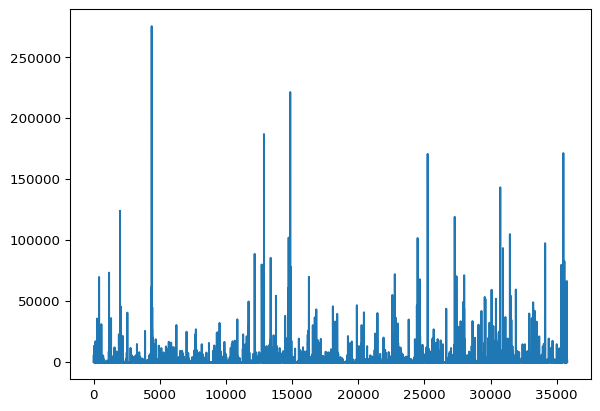

In [ ]:
df['Déchets'].plot()

The equivalent code with `matplotlib` would be:

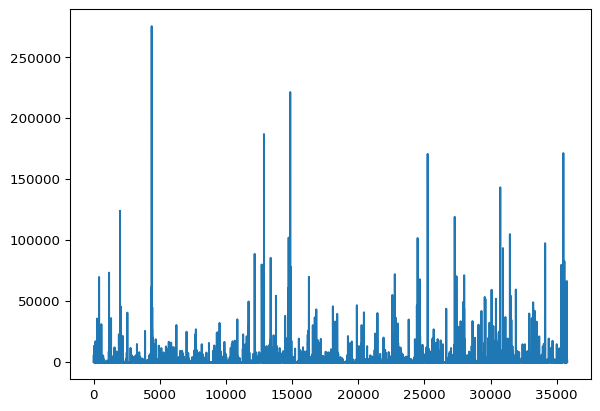

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Déchets'])

By default, the obtained visualization is a series. This is not necessarily what is expected since it only makes sense for time series. As a data scientist working with microdata, you are more often interested in a histogram to get an idea of the data distribution. To do this, simply add the argument `kind = 'hist'`:

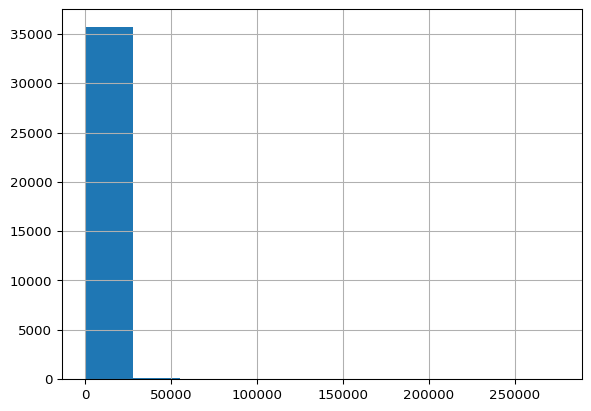

In [ ]:
df['Déchets'].hist()

With data that has a non-normalized distribution, which represents many real-world variables, histograms are generally not very informative. The log can be a solution to bring some extreme values to a comparable scale:

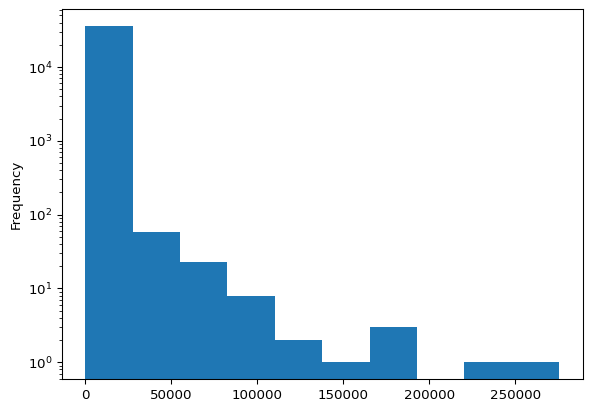

In [ ]:
df['Déchets'].plot(kind = 'hist', logy = True)

The output is a `matplotlib` object. Customizing these figures is thus possible (and even desirable because the default `matplotlib` graphs are quite basic). However, this is a quick method for constructing figures that require work for a finalized visualization. This involves thorough work on the `matplotlib` object or using a higher-level library for graphical representation (`seaborn`, `plotnine`, `plotly`, etc.).

The part of this course dedicated to data visualization will briefly present these different visualization paradigms. These do not exempt you from using common sense in choosing the graph used to represent a descriptive statistic (see [this conference by Eric Mauvière](https://ssphub.netlify.app/talk/2024-02-29-mauviere/)).

# 9. Synthesis exercise

This exercise synthesizes several steps of data preparation and exploration to better understand the structure of the phenomenon we want to study, namely carbon emissions in France.

It is recommended to start from a clean session (in a notebook, you should do `Restart Kernel`) to avoid an environment polluted by other objects. You can then run the following code to get the necessary base:

In [ ]:
import pandas as pd

emissions = pd.read_csv("https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert")
emissions.head(2)

> **Exercise 2: Discovering the <code>Pandas</code> Verbs for Data Manipulation**
>
> First, let’s get familiar with operations on columns.
>
> 1.  Create a `DataFrame` `emissions_copy` keeping only the columns `INSEE commune`, `Commune`, `Autres transports`, and `Autres transports international`.
>
> <details>
>
> <summary>
>
> Hint for this question
>
> </summary>
>
> ![](https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/select_pandas.png)
>
> </details>
>
> 1.  Since the variable names are not practical, rename them as follows:
>     -   `INSEE commune` $\to$ `code_insee`
>     -   `Autres transports` $\to$ `transports`
>     -   `Autres transports international` $\to$ `transports_international`
>
> <details>
>
> <summary>
>
> Hint for this question
>
> </summary>
>
> ![](https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/rename_pandas.png)
>
> </details>
>
> 1.  For simplicity, replace missing values (`NA`) with 0. Use the [`fillna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) method to transform missing values into 0.
>
> 2.  Create the following variables:
>
>     -   `dep`: the department. This can be created using the first two characters of `code_insee` by applying the `str` method;
>     -   `transports_total`: the emissions of the transport sector (sum of the two variables).
>
> <details>
>
> <summary>
>
> Hint for this question
>
> </summary>
>
> ![](https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/mutate_pandas.png)
>
> </details>
>
> 1.  Order the data from the biggest polluter to the smallest, then order the data from the biggest polluter to the smallest by department (from 01 to 95).
>
> <details>
>
> <summary>
>
> Hint for this question
>
> </summary>
>
> ![](https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/arrange_pandas.png)
>
> </details>
>
> 1.  Keep only the municipalities belonging to departments 13 or 31. Order these municipalities from the biggest polluter to the smallest.
>
> <details>
>
> <summary>
>
> Hint for this question
>
> </summary>
>
> ![](https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/filter_pandas.png)
>
> </details>
>
> Return to the initial `emission` dataset.
>
> 1.  Calculate the total emissions by sector. Calculate the share of each sector in total emissions. Convert the volumes to tons before displaying the results.
>
> 2.  Calculate the total emissions for each municipality after imputing missing values to 0. Keep the top 100 emitting municipalities. Calculate the share of each sector in this emission. Understand the factors that may explain this ranking.
>
> <details>
>
> <summary>
>
> Help if you are struggling with question 8
>
> </summary>
>
> Play with the `axis` parameter when constructing an aggregate statistic.
>
> </details>

In question 5, when the communes are ordered exclusively on the basis of the variable `transport_total`, the result is as follows:

Question 6 gives us this classification:

In question 7, the resulting table looks like this

At the end of question 8, we better understand the factors that can explain high emissions at the municipal level. If we look at the top three emitting municipalities, we can see that they are cities with refineries:

Thanks to our minimal explorations with `Pandas`, we see that this dataset provides information about the nature of the French productive fabric and the environmental consequences of certain activities.

# References

-   The site [pandas.pydata](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html) serves as a reference

-   The book `Modern Pandas` by Tom Augspurger: https://tomaugspurger.github.io/modern-1-intro.html

McKinney, Wes. 2012. *Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython*. " O’Reilly Media, Inc.".

Wickham, Hadley, Mine Çetinkaya-Rundel, and Garrett Grolemund. 2023. *R for Data Science*. " O’Reilly Media, Inc.".